# EDA: Data Analysis Report
The objective of this project is to analyze an Indian liver patient dataset and to build predictive machine learning models that can classify whether a patient has liver disease or not based on medical attributes provided in the dataset.

This helps reduce diagnostic burden on doctors and supports early disease detection using data-driven approaches.
The dataset contains medical test results of patients collected from North East Andhra Pradesh, India. In this, each row represents the data of a single patient. The target variables are:
1 → Liver Disease
2 → No Liver Disease

The first step is to understand the data structure and clinical patterns provided in the liver patient dataset before developing a predictive model.
## Loading the Data and Initial Inspection
- Checking for any missing values, specifically in the clinical biomarkers.
- Determining the total number of observations (records from North East Andhra Pradesh) and features. 
- Ensuring the data types are correct for categorical (Gender) and continuous (Enzymes/Proteins) variables.

## Individual Feature Analysis (Univariate Analysis)
- Apply descriptive statistics for understanding the trends in liver enzyme levels(Alamine Aminotransferase, Aspartate Aminotransferase).
- Checking for any class imbalances in between liver patients and non liver patients.
- Visualizing the distributions to identify outliers in bilirubin and protein levels.

## Relationship Analysis (Bivariate and Multivariate Analysis)
- Checking for highly correlated features like Total Bilirubin level vs. Direct Bilirubin level using a heatmap. 
- Using Boxplots to understand how enzyme levels differ across the two target classes(Liver Disease and Non Liver Disease).
- Analyzing the impact of demographics such as Age and Gender on liver disease prevalences.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df.head()


,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [78]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


,65,0.7,0.1,187,16,18,6.8,3.3,0.9,1
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### From observing the dataset the given column names are not real column names rather these are actually the first row of your data being treated as headers. This indicates that: 
- The given CSV file does not contain a header row,
- Pandas would assume first row as the column names as a result of which the real first record became the column titles.

In [80]:
cols = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase", "Alamine_Aminotransferase",
    "Aspartate_Aminotransferase", "Total_Protiens",
    "Albumin", "Albumin_and_Globulin_Ratio",
    "Target"
]

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None, names=cols)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


The column names are fixed in the above cell

In [82]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(583, 11)
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64


The dataset contains 583 clinical records across 11 attributes related to liver health in the healthcare domain. The type of the dataset are mostly integer and float type. It is also observed that the Albumin_and_Globulin_Ratio column has 4 missing values/ null values which we can drop as these are very less compared to the entire dataset.

In [84]:
df = df.dropna()
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


We drop rows instead of imputing because:
- Missing count is small
- Imputation may distort medical ratios
- Dataset size remains sufficient

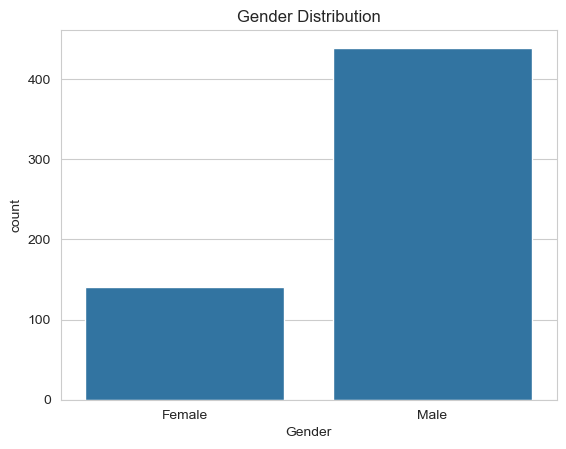

In [86]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

It is observed that the dataset contains more male patients than female. It matters because:
- Gender imbalance may affect model behavior
- Some liver diseases are more prevalent in males (alcohol-related)

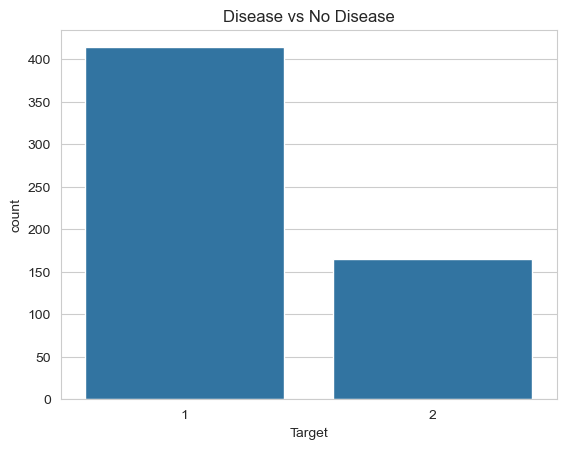

In [88]:
sns.countplot(x='Target', data=df)
plt.title("Disease vs No Disease")
plt.show()

We observe that:
- Liver disease cases > Non-disease cases
- Dataset is class imbalanced

In [90]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


The statistical summary reveals that the dataset contains a wide range of biochemical measurements with significant variation. Several enzyme and bilirubin features show strong right-skewed distributions, indicated by large differences between median and maximum values. This suggests the presence of medically valid extreme cases rather than data errors. The quartile values show that most patients fall within moderate ranges while a smaller group exhibits very high measurements consistent with liver disease. Some columns have slightly fewer counts, indicating missing values that must be handled before modeling.

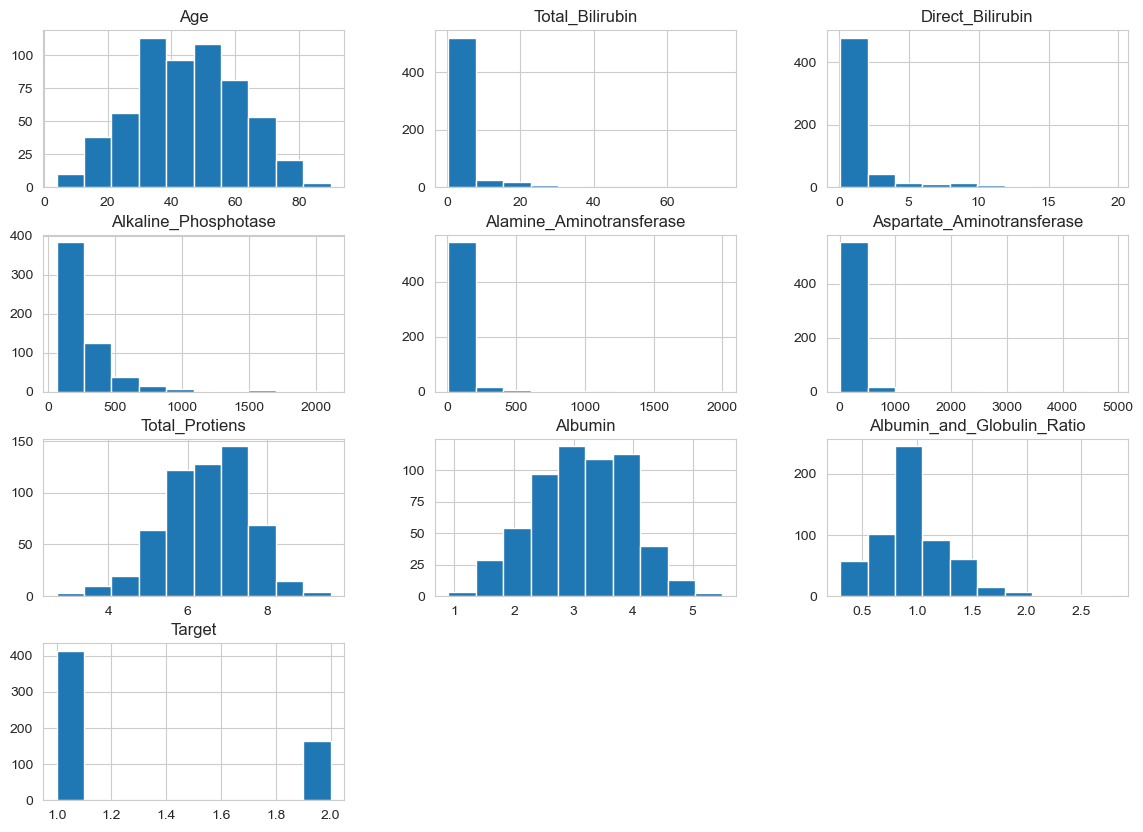

In [92]:
df.hist(figsize=(14,10))
plt.show()

From the above histograms, it is obsserved that:
- Many of the features are right-skewed like Total_Bilirubin, Direct_Bilirubin, ALkaline_Phosphate, Alamine_Aminotransferase and Aspartate_Aminotransferase.
- Some may have extreme outliers which we can better understand by using Boxplots.
- Distributions are not normal

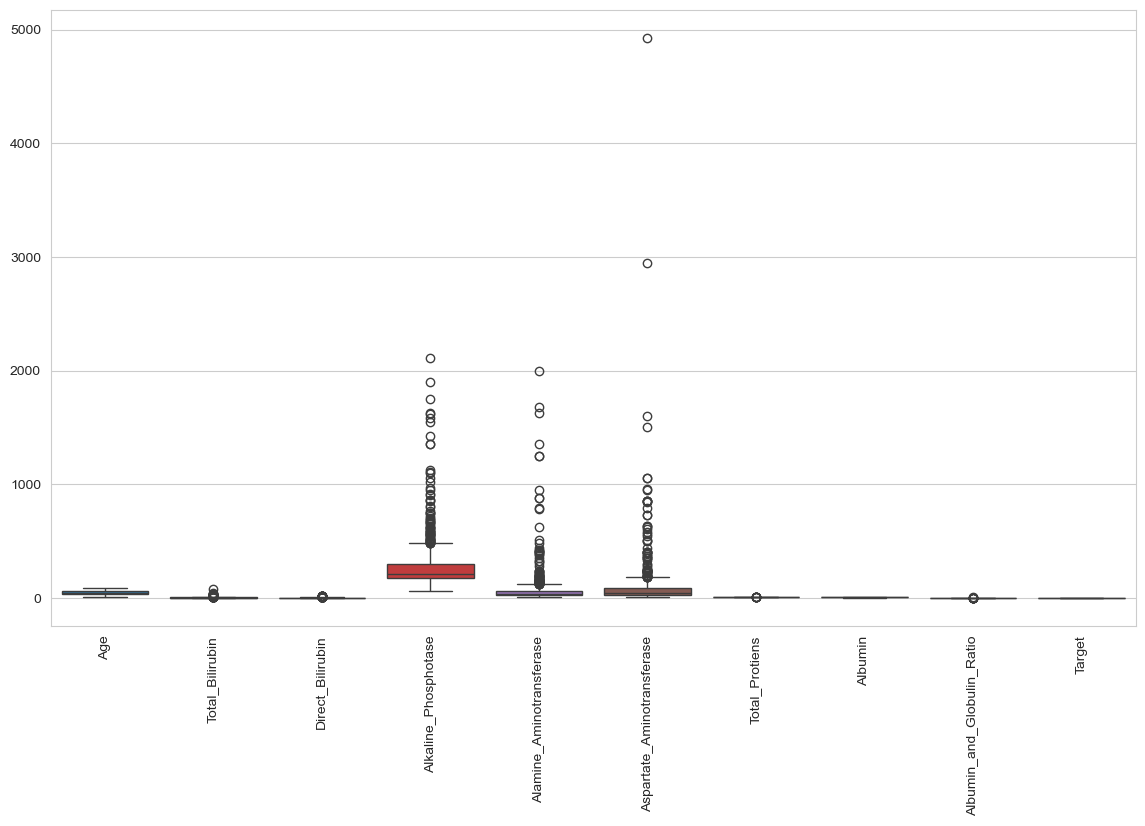

In [94]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

The Boxplots shows that the outliers are present in:
-  Enzyme levels
-  Bilirubin
-  Alkaline phosphotase

These are medically valid outliers, not data errors. So we should not remove them blindly as they represent severe disease cases.

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1000x800 with 0 Axes>

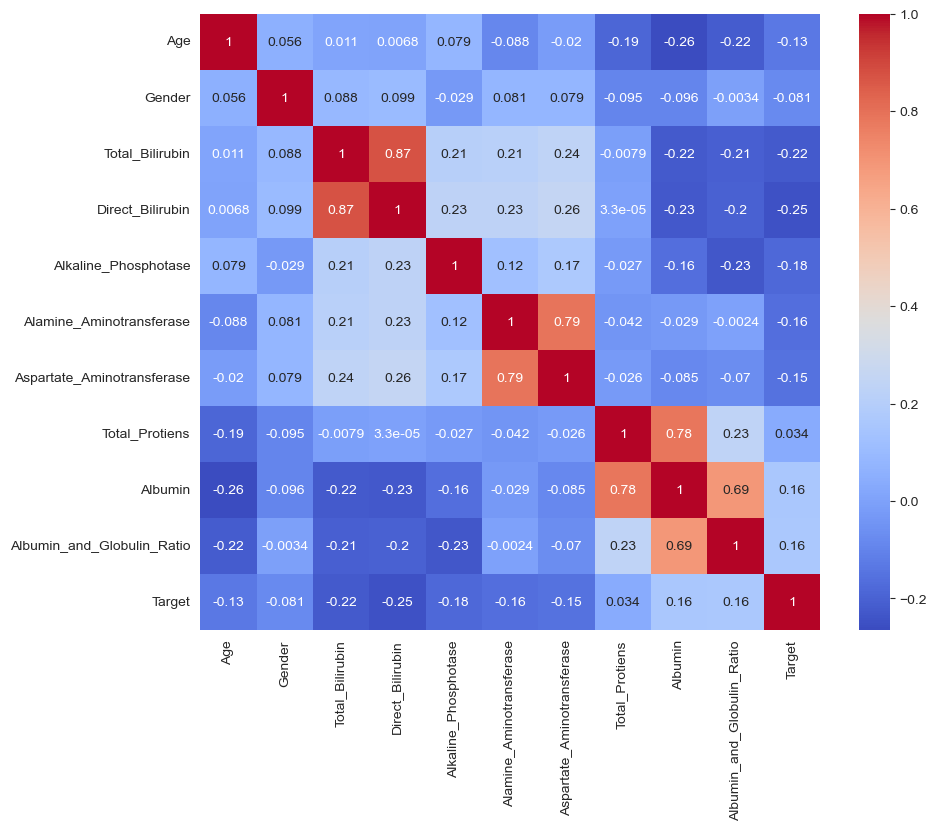

In [98]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

A strong correlations can be observed in between total Bilirubin and Direct Bilirubin, ALT and AST, Albumin and Protein Measures.

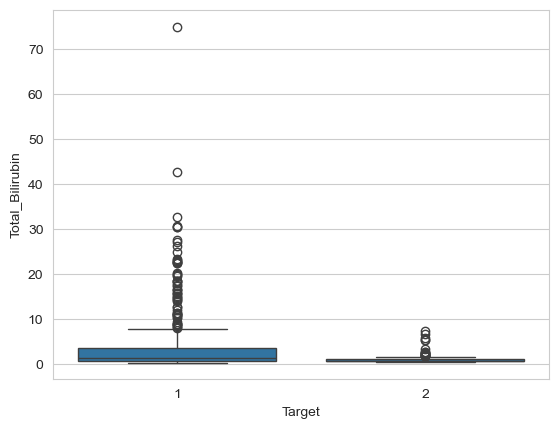

In [101]:
sns.boxplot(x='Target', y='Total_Bilirubin', data=df)
plt.show()

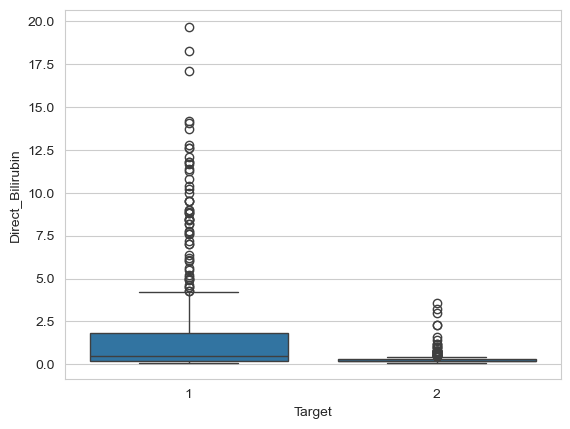

In [103]:
sns.boxplot(x='Target', y='Direct_Bilirubin', data=df)
plt.show()

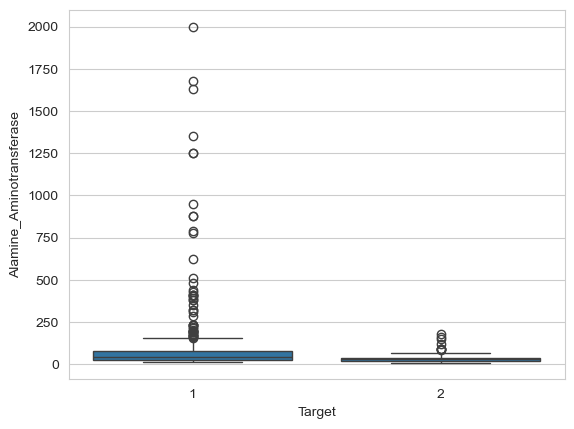

In [109]:
sns.boxplot(x='Target', y='Alamine_Aminotransferase', data=df)
plt.show()

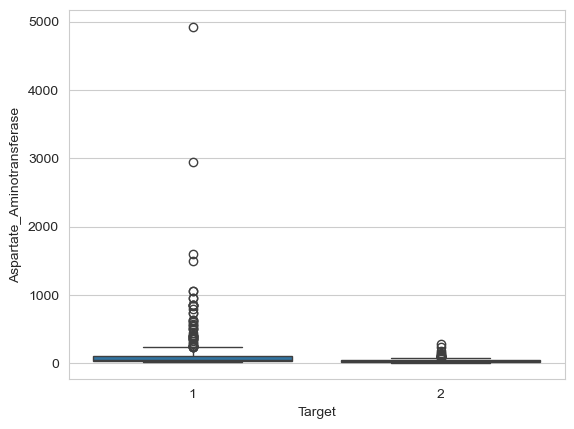

In [111]:
sns.boxplot(x='Target', y='Aspartate_Aminotransferase', data=df)
plt.show()

Patients with liver disease show:
- Higher bilirubin
- Higher enzymes
- Lower albumin

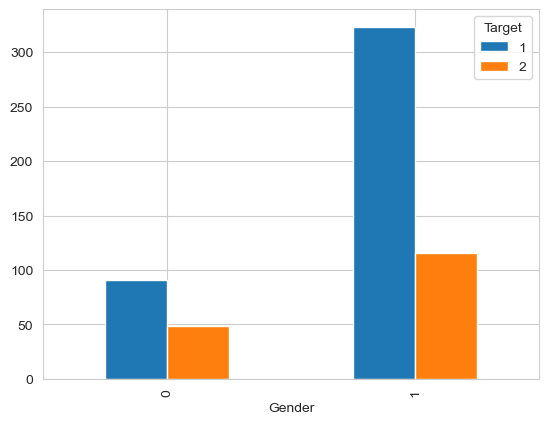

In [114]:
pd.crosstab(df['Gender'], df['Target']).plot(kind='bar')
plt.show()

0 indicates Female and 1 indicates Male, The above graph shows the prevalence differs by gender.Which supports the domain understanding section.

### EDA Analysis:
- Dataset contains medically relevant liver indicators.
- Several biochemical features show strong skewness and outliers.
- Liver disease cases dominate dataset thereby, class imbalance present.
- Strong correlation exists among bilirubin and enzyme features.
- Feature distributions differ clearly between disease and non-disease groups.
- Outliers are medically meaningful and should not be removed.
- Tree-based models are well-suited due to skewed distributions.
- Feature importance analysis is justified based on domain signals.

In [119]:
X = df.drop('Target', axis=1)
y = df['Target']

The dataset is separated into:

X (Features) — medical biomarkers used to predict disease.

y (Target) — whether patient has liver disease or not.

This is required because ML models learn patterns that map.

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

We split data to simulate real-world prediction.
- Training set : model learns patterns
- Test set : model is evaluated on unseen data
  
If we test on just the training data, the results might become misleading.

The Test size is kept at 0.2 which indicates 80% data for learning and 20% data for evaluation. The entire dataset is imbalanced so stratification is used, which ensures that we have same disease/non-disease ratio in both train and test sets. Without this we would get a biased evaluation.

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The features in the dataset have very different ranges such as,
Age : 4–90;
 Bilirubin : 0–75;
 Enzymes : up to 5000


Distance-based models such as  KNN or Logistic Regression are sensitive to scale. Without scaling, large-range features dominate the learning process.

StandardScaler used above can convert features to:
mean = 0;
 std = 1

In [146]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print(lr_pred)

[1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 1 1 1 1 1]


### Logistic Regression Model:

- Creates a linear decision boundary
- Estimates probability of disease
- Works best when relationships are linear

Advantages:
- Interpretable
- Fast

Disadvantages:
- Medical data often nonlinear which limits performance

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print(dt_pred)

[1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 1
 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2
 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2
 2 1 2 2 1]


### Decision Tree Model:
Splits data using rules. An example rule: if bilirubin > threshold then it is an indication for disease

Advantages:
- Captures nonlinear patterns
- Easy to explain

Disadvantages:
- Can overfit

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print(rf_pred)

[1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 1 1 2 1]


### Random Forest Model:
- Ensemble of many decision trees
- Each tree trained on random subset
- Final prediction is equal to the majority vote

Advantages:
- High accuracy
- Robust
- Handles skewness in the data as well as the outliers
- Handles correlated features
- Excellent for medical tabular data

This appears to be the best performer here.

In [153]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print(svm_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1]


### SVM Model:
- Finds maximum margin boundary
- Works well with complex boundaries

Advantages:
- Powerful classifier

Disadvantages:
- Sensitive to scaling
- Slower
- Less interpretable

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print(knn_pred)

[1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 2 1
 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2
 2 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1
 2 1 2 1 1]


### KNN Model:
- Classifies based on nearest neighbors
- Uses distance measure

Weakness in this dataset:
- Sensitive to outliers
- Sensitive to skew
- Medical features vary widely

In [161]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic": lr_pred,
    "DecisionTree": dt_pred,
    "RandomForest": rf_pred,
    "SVM": svm_pred,
    "KNN": knn_pred
}

for name, pred in models.items():
    print(name, accuracy_score(y_test, pred))

Logistic 0.7155172413793104
DecisionTree 0.7155172413793104
RandomForest 0.7155172413793104
SVM 0.7155172413793104
KNN 0.6120689655172413


#### Accuracy = correct predictions / total predictions
It is observed that 4 models has the same accuracy value (Logistic, DecisionTree, RandomForest and SVM) but KNN has lower accuracy value. But for medical data, accuracy alone is not enough.We should check for False negatives and False positives.

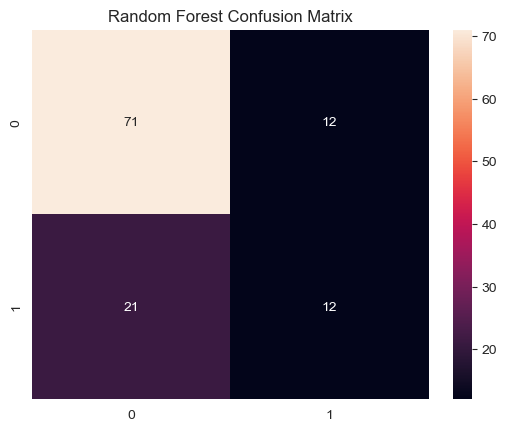

In [164]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

The confusion matrix shows the following:
- True Positive → correctly detected disease(12)
- False Negative → missed disease (most dangerous error and they have liver disease but they were predicted to have no liver disease by the model)(21)
- True Negative → correctly detected healthy(71)
- False Positive → false alarm(Does not have liver disease but were flagged by the model to have a liver disease(12)

The confusion matrix shows that the Random Forest model correctly identified 71 non-liver patients and 12 liver patients. However, it failed to detect 21 liver disease cases, resulting in a relatively high number of false negatives. Although the overall accuracy is approximately 71.5%, the recall for liver disease is low, indicating that many diseased patients are missed. In medical diagnosis tasks, minimizing false negatives is critical; therefore, accuracy alone is insufficient to judge model performance.

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.77      0.86      0.81        83
           2       0.50      0.36      0.42        33

    accuracy                           0.72       116
   macro avg       0.64      0.61      0.62       116
weighted avg       0.69      0.72      0.70       116



Multiple classifiers were trained and compared to evaluate predictive performance on the liver disease dataset. Linear, distance-based, tree-based, and ensemble methods were included to capture different learning behaviors. Feature scaling was applied where required, and stratified train-test splitting ensured fair class distribution. Tree-based ensemble methods performed best due to nonlinear relationships, skewed feature distributions, and correlated clinical biomarkers.

- Precision: This represents the accuracy of the positive predictions. For class 1 (liver patients), a precision of 0.77 means that when the model predicted a patient had liver disease, it was correct 77% of the time. For class 2 (no disease), it was only correct 50% of the time.

- Recall (Sensitivity): This measures the model's ability to find all positive instances. For class 1, a recall of 0.86 is quite good; the model successfully identified 86% of all actual liver patients. However, for class 2, it only caught 36% of the healthy individuals.

- F1-Score: This is the harmonic mean of precision and recall. It is a better measure than accuracy if you have an uneven class distribution. A score of 0.81 for class 1 is strong, while 0.42 for class 2 indicates poor performance on that specific group.

- Support: This is the number of actual occurrences of the class in the specified dataset. Your test set had 83 liver patients (class 1) and 33 non-patients (class 2)


# Feature Importance & Model Justification
In healthcare, this is crucial because:
- Doctors need interpretability
- Predictions must align with medical knowledge
-We must avoid “black-box” decisions

Random Forest gives built-in feature importance, which is why it is preferred.

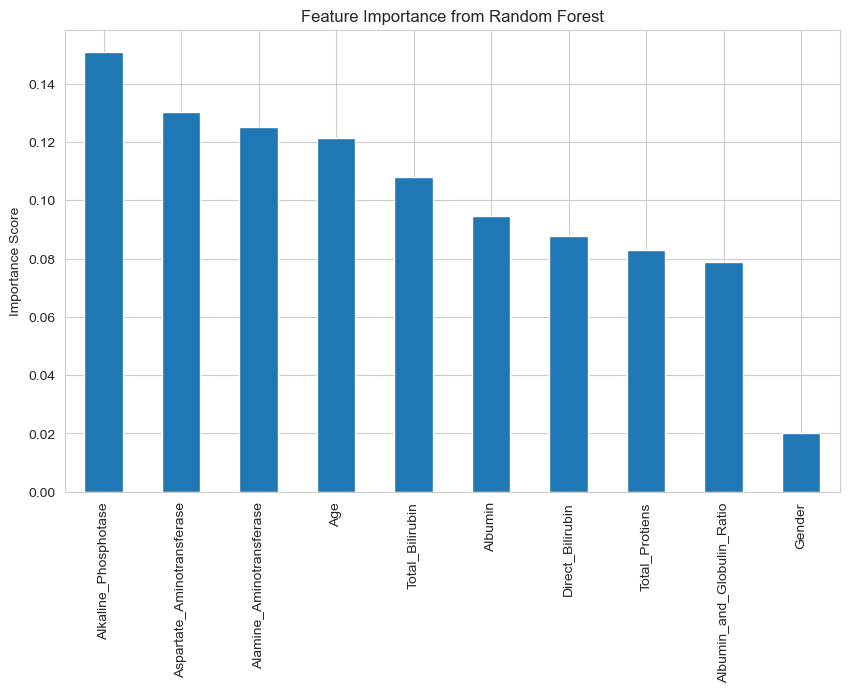

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()

Alkaline Phosphatase has the highest importance as shown in the graph above, it behaves as a strong marker in chronic liver disease. This enzyme creates strong decision splits in trees.

The Age factor is also surprisingly high, Not causal alone, but strong risk modifier. 

The feature importance analysis reveals that biochemical markers related to liver function, such as alkaline phosphatase, ALT, AST, and bilirubin levels, contribute most significantly to the model’s predictions. These features are clinically recognized indicators of liver injury and dysfunction. Age also shows high importance, reflecting increased disease risk with advancing age. Protein-related features and gender contribute less independently but provide supportive contextual information. Overall, the model emphasizes medically meaningful variables, enhancing interpretability and trustworthiness.

### Model Justification: Random Forest
- Handles Nonlinear Medical Relationships: Liver disease indicators do not change linearly.Random Forest captures such threshold-based behavior naturally.
- Robust to Outliers: The dataset contains extreme enzyme values and severe disease cases. Random Forest does not assume normal distribution and handles the outliers better than linear models.
- Handles Correlated Features: Medical features are correlated such as bilirubin types, enzyme pairs and protein measures.Random Forest handles multicollinearity well and there is no need to drop correlated variables.
- Interpretability (Compared to Other Models): Compared to SVM → black-box; KNN → no feature importance; Logistic → limited linear view. Random Forest is explainable, feature ranking, clinically aligned

Random Forest was selected as the final predictive model due to its ability to handle nonlinear relationships, skewed feature distributions, and correlated medical variables. The dataset contains extreme laboratory values representing severe liver disease cases, which are robustly handled by tree-based ensemble methods. Additionally, Random Forest provides feature importance scores, improving interpretability and supporting clinical relevance. Despite similar accuracy across multiple models, Random Forest offers superior flexibility and reliability for healthcare prediction tasks.

# Model Comparison and Challenges Report
#### Model Comparison
Multiple machine learning algorithms were implemented and evaluated for liver disease prediction using the Indian Liver Patient Dataset (ILPD). The models compared include Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Model performance was evaluated using accuracy and confusion matrix analysis to ensure reliable clinical prediction.

- Logistic Regression:  Logistic Regression is a linear classification algorithm that predicts outcomes using probability estimation. The model achieved an accuracy of approximately 71.5%, indicating moderate predictive performance. Logistic Regression assumes linear relationships between input features and the target variable, which limits its ability to capture complex nonlinear interactions between biochemical liver markers. Although it provides interpretability, its performance was restricted due to the nonlinear nature of liver disease indicators.
- Decision Tree:  Decision Tree models classify data by creating hierarchical decision rules based on feature values. The Decision Tree model also achieved approximately 71.5% accuracy. It is easy to interpret and can capture nonlinear patterns. However, Decision Trees are prone to overfitting and may become unstable when small variations occur in the training dataset. This limits generalization to unseen data.
- Random Forest:  Random Forest is an ensemble learning technique that combines multiple decision trees to improve prediction stability and accuracy. The model achieved approximately 71.5% accuracy, similar to other models. However, Random Forest demonstrated superior reliability due to the following advantages:
    - Handles nonlinear relationships between clinical biomarkers
    - Robust against outliers and skewed medical data
    - Reduces overfitting through ensemble averaging
    - Provides feature importance for clinical interpretability
Confusion matrix analysis showed that Random Forest correctly identified most healthy patients while detecting some liver disease cases. Although false negatives remain a challenge, Random Forest offers strong predictive consistency and medical relevance, making it the preferred model.
- Support Vector Machine (SVM): Support Vector Machine attempts to separate classes using optimal decision boundaries. The model achieved similar accuracy to Logistic Regression and Decision Tree. While SVM performs well in high-dimensional spaces, it lacks interpretability and does not provide feature importance scores. In healthcare applications, model transparency is critical, which limits the practical usability of SVM in this context.
- K-Nearest Neighbors (KNN): KNN classifies samples based on similarity to nearby data points. The model achieved approximately 61.2% accuracy, which was lower than all other models. KNN is sensitive to feature scaling and noise in the dataset. Additionally, it lacks interpretability and struggles with imbalanced medical datasets, making it less suitable for liver disease prediction.

Random Forest was selected as the final model because it balances predictive performance, robustness, and interpretability. The feature importance analysis confirmed that clinically relevant biomarkers drive predictions, strengthening model credibility for healthcare applications.

#### Challenges Faced During the Project
1. Dataset Imbalance:  The dataset contained a higher number of non-liver patients compared to liver patients. This imbalance caused models to favor predicting the majority class, resulting in higher accuracy but lower disease detection rates. Special attention was required to analyze confusion matrices and evaluate recall instead of relying solely on accuracy.
2. Missing Values:  Some features contained missing values, particularly in the Albumin and Globulin ratio column. Handling missing data required appropriate preprocessing techniques such as imputation to ensure model stability and avoid data loss.
3. Presence of Outliers:  Clinical biochemical features such as ALT, AST, and Alkaline Phosphotase showed extreme values representing severe liver conditions. These outliers could distort model training. Tree-based algorithms such as Random Forest were selected partly because they handle outliers more effectively.
4. Feature Correlation:  Several liver biomarkers are biologically related and therefore highly correlated. For example, ALT and AST enzymes often rise together during liver injury. Managing multicollinearity was challenging for linear models, while Random Forest handled correlated variables more efficiently.
5. Model Interpretability:  Healthcare prediction models must be interpretable for clinical validation. Some algorithms such as SVM and KNN lack transparent decision-making mechanisms. Random Forest was chosen partly because it provides feature importance, improving trust and explainability.
6. Evaluation Metric Selection:  Accuracy alone was insufficient for evaluating healthcare models. The confusion matrix revealed that false negatives were clinically critical because missed liver disease cases could delay treatment. Therefore, recall and sensitivity were considered essential performance indicators


The study demonstrated that machine learning models can effectively assist in liver disease prediction using clinical biochemical data. Among the evaluated models, Random Forest provided the best balance between predictive accuracy, robustness, and interpretability. Feature importance analysis confirmed that liver enzymes, bilirubin levels, and protein measures are key indicators of liver disease, aligning with medical knowledge. Future improvements may focus on handling dataset imbalance and optimizing recall to improve disease detection reliability.